In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-07-25 16:45:14--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   137MB/s    in 0.5s    

2023-07-25 16:45:14 (137 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

In [3]:
# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')


In [5]:
# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 20s - loss: 0.6908 - accuracy: 0.5295 - val_loss: 0.6782 - val_accuracy: 0.5270 - 20s/epoch - 197ms/step
Epoch 2/20
100/100 - 8s - loss: 0.6748 - accuracy: 0.5770 - val_loss: 0.6564 - val_accuracy: 0.6080 - 8s/epoch - 83ms/step
Epoch 3/20
100/100 - 8s - loss: 0.6530 - accuracy: 0.6140 - val_loss: 0.6578 - val_accuracy: 0.6150 - 8s/epoch - 83ms/step
Epoch 4/20
100/100 - 8s - loss: 0.6328 - accuracy: 0.6370 - val_loss: 0.6150 - val_accuracy: 0.6490 - 8s/epoch - 82ms/step
Epoch 5/20
100/100 - 8s - loss: 0.5887 - accuracy: 0.6740 - val_loss: 0.6023 - val_accuracy: 0.6880 - 8s/epoch - 83ms/step
Epoch 6/20
100/100 - 8s - loss: 0.5598 - accuracy: 0.7115 - val_loss: 0.5878 - val_accuracy: 0.6880 - 8s/epoch - 83ms/step
Epoch 7/20
100/100 - 8s - loss: 0.5424 - accuracy: 0.7185 - val_loss: 0.5787 - val_accuracy: 0.7110 - 8s/epoch - 83ms/step
Epoch 8/20
100/100 - 8s - loss: 0.5255 - accuracy: 0.7440 - val_loss: 0.5794 - val_accuracy: 0.6950 - 8s/epoch - 83ms/step
Epoch 9/20
10

In [10]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

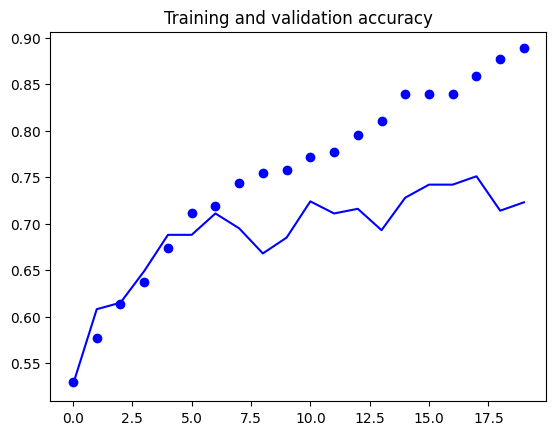

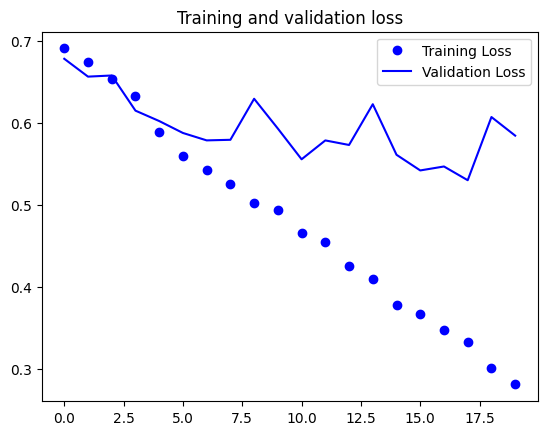

In [11]:
# Plot training results
plot_loss_acc(history)

In [12]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 19s - loss: 0.6935 - accuracy: 0.5165 - val_loss: 0.6861 - val_accuracy: 0.5700 - 19s/epoch - 188ms/step
Epoch 2/20
100/100 - 17s - loss: 0.6871 - accuracy: 0.5460 - val_loss: 0.6755 - val_accuracy: 0.6010 - 17s/epoch - 170ms/step
Epoch 3/20
100/100 - 17s - loss: 0.6792 - accuracy: 0.5610 - val_loss: 0.6645 - val_accuracy: 0.5710 - 17s/epoch - 170ms/step
Epoch 4/20
100/100 - 17s - loss: 0.6723 - accuracy: 0.5795 - val_loss: 0.6479 - val_accuracy: 0.6230 - 17s/epoch - 170ms/step
Epoch 5/20
100/100 - 17s - loss: 0.6676 - accuracy: 0.5865 - val_loss: 0.6490 - val_accuracy: 0.6130 - 17s/epoch - 171ms/step
Epoch 6/20
100/100 - 17s - loss: 0.6526 - accuracy: 0.6075 - val_loss: 0.6198 - val_accuracy: 0.6610 - 17s/epoch - 169ms/step
Epoch 7/20
100/100 - 17s - loss: 0.6437 - accuracy: 0.6065 - val_loss: 0.6079 - val_accuracy: 0.6630 - 17s/epoch - 169ms/step
Epoch 8/20
100/100 - 17s - loss: 0

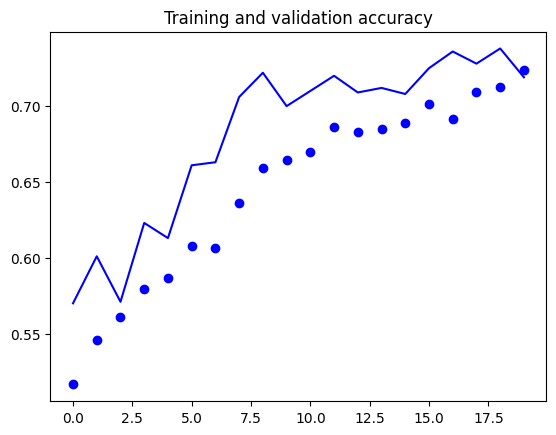

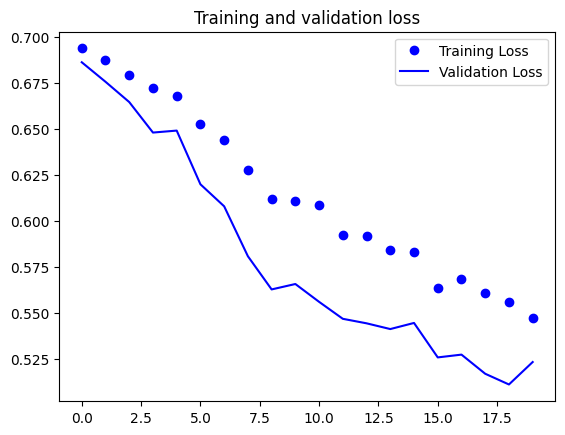

In [13]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)